# Decision Point Price Momentum Oscillator (PMO)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:dppmo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-05:00,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27 00:00:00-05:00,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28 00:00:00-05:00,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29 00:00:00-05:00,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30 00:00:00-05:00,128.410004,129.949997,127.430000,129.929993,129.731918,77034200


In [4]:
df['ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close'].shift(1)) * 100
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC
Date,,,,,,,
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048


In [5]:
df['35_Custom_EMA_ROC'] = df['ROC'].ewm(ignore_na=False,span=35,min_periods=0,adjust=True).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC
Date,,,,,,,,
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187,-0.972187
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816,-0.062414
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314,-0.206222
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643,0.287103
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048,0.697643


In [6]:
df['35_Custom_EMA_ROC_10'] = df['35_Custom_EMA_ROC']*10
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10
Date,,,,,,,,,
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187,-0.972187,-9.721871
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816,-0.062414,-0.624139
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314,-0.206222,-2.062221
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643,0.287103,2.871031
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048,0.697643,6.976430


In [7]:
df = df.dropna()
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10
Date,,,,,,,,,
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187,-0.972187,-9.721871
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816,-0.062414,-0.624139
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314,-0.206222,-2.062221
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643,0.287103,2.871031
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048,0.697643,6.976430
2020-01-10 00:00:00-05:00,77.650002,78.167503,77.062500,77.582497,75.889969,140644800,0.226105,0.607412,6.074116
2020-01-13 00:00:00-05:00,77.910004,79.267502,77.787498,79.239998,77.511292,121532000,2.136412,0.865012,8.650120
2020-01-14 00:00:00-05:00,79.175003,79.392502,78.042503,78.169998,76.464645,161954400,-1.350314,0.529651,5.296512
2020-01-15 00:00:00-05:00,77.962502,78.875000,77.387497,77.834999,76.136940,121923600,-0.428571,0.397278,3.972783


In [8]:
df['PMO_Line'] = df['35_Custom_EMA_ROC_10'].ewm(ignore_na=False,span=20,min_periods=0,adjust=True).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,PMO_Line
Date,,,,,,,,,,
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187,-0.972187,-9.721871,-9.721871
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816,-0.062414,-0.624139,-4.945562
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314,-0.206222,-2.062221,-3.886817
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643,0.287103,2.871031,-1.935930
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048,0.697643,6.976430,0.219894


In [9]:
df['PMO_Signal_Line'] = df['PMO_Line'].ewm(ignore_na=False,span=10,min_periods=0,adjust=True).mean()

In [10]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,PMO_Line,PMO_Signal_Line
Date,,,,,,,,,,,
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187,-0.972187,-9.721871,-9.721871,-9.721871
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816,-0.062414,-0.624139,-4.945562,-7.094901
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314,-0.206222,-2.062221,-3.886817,-5.805272
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643,0.287103,2.871031,-1.935930,-4.530497
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048,0.697643,6.976430,0.219894,-3.166789


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

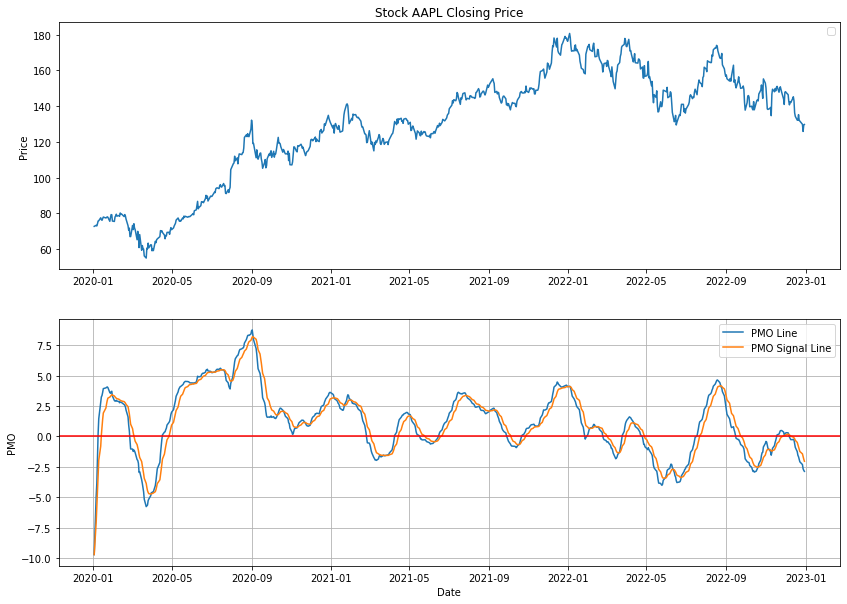

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PMO_Line'], label='PMO Line')
ax2.plot(df['PMO_Signal_Line'], label='PMO Signal Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')

## Candlestick with PMO

In [12]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,PMO_Line,PMO_Signal_Line,VolumePositive
0,18264.208333,74.287498,75.144997,74.125000,74.357498,72.735329,146322800,-0.972187,-0.972187,-9.721871,-9.721871,-9.721871,False
1,18267.208333,73.447502,74.989998,73.187500,74.949997,73.314896,118387200,0.796816,-0.062414,-0.624139,-4.945562,-7.094901,False
2,18268.208333,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470314,-0.206222,-2.062221,-3.886817,-5.805272,False
3,18269.208333,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,1.608643,0.287103,2.871031,-1.935930,-4.530497,False
4,18270.208333,76.809998,77.607498,76.550003,77.407501,75.718765,170108400,2.124048,0.697643,6.976430,0.219894,-3.166789,False


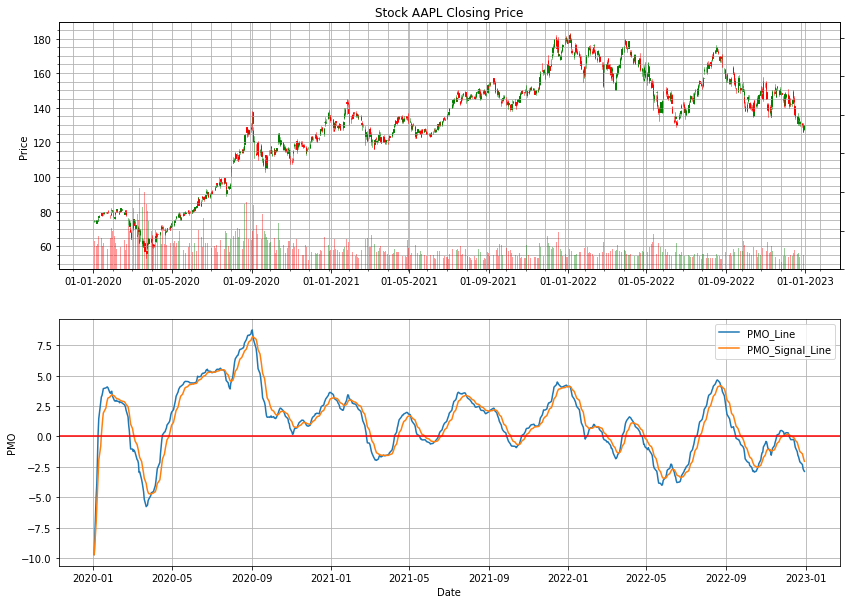

In [14]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PMO_Line'], label='PMO_Line')
ax2.plot(df['PMO_Signal_Line'], label='PMO_Signal_Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')
ax2.legend(loc='best')